# Data Pre Processing

In [1]:
import cv2,os
import random
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import np_utils

data_path='Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-j8nxabm_\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-j8nxabm_\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-j8nxabm_\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-j8nxabm_\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-j8nxabm_\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::c

# Rescale and assign  catagorical lables

In [3]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
new_target=np_utils.to_categorical(target)

In [4]:
new_target.shape

(6831, 2)

In [5]:
np.save('images.npy',data)
np.save('labels.npy',new_target)


In [6]:
data=np.load('images.npy')
new_target=np.load('labels.npy')

In [7]:
data.shape

(6831, 100, 100, 1)

In [8]:
data.shape[1:]

(100, 100, 1)

# Creating a Model

# Basic Introduction to CNN Layers

1.Conv2D=Convolution is the first layer to extract features from an input image. Convolution preserves the relationship between 
pixels by learning image features using small squares of input data. It is a mathematical operation that takes two inputs such as image matrix and a filter or kernel.

2.MaxPooling2D=Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. Pooling layer operates on each feature map independently. The most common approach used in pooling is max pooling.It works on even number matrices and take the max of them.

3.Flatten=It takes 2D data from MaxPooling and convert it to 1D and send to the dense layer.

4.Dense=A dense layer is a classic fully connected neural network layer : each input node is connected to each 
output node.It is basically used for getting output.

5.Dropout= A dropout layer is similar to Dense layer except that when the layer is used, the activations are set
to zero for some random nodes. This is a way to prevent overfitting.

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [12]:
train_data.shape

(6147, 100, 100, 1)

In [13]:
train_target.shape

(6147, 2)

# Fit the Model to training data

In [14]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=15,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/15
154/154 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.5739WARNING:tensorflow:From c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
154/154 [==============================] - 187s 1s/step - loss: 0.6813 - accuracy: 0.5739 - val_loss: 0.6440 - val_accuracy: 0.6398
Epoch 2/15
154/154 [==============================] - 187s 1s/step - loss: 0.6038 - accuracy: 0.6687 - val_loss: 0.5738 - val_accuracy: 0.6789
Epoch 3/15
154/154 [==============================] - 197s 1s/step - l

# Plot the performance of the Model

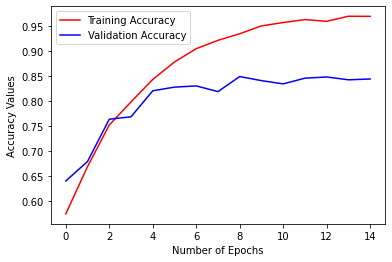

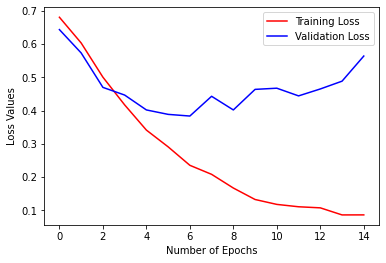

In [15]:
#Graph for loss and accuracy
plt.plot(history.history['accuracy'],'r',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Values')
plt.legend()
plt.show()
plt.plot(history.history['loss'],'r',label='Training Loss')
plt.plot(history.history['val_loss'],'b',label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Values')
plt.legend()
plt.show()

In [1]:
print('Hello World')

Hello World


In [8]:
from pprint import pprint
dict1=[{'Guri':'Guri','Arsh':'Arsh'},{'Guri':1,'Arsh':2},{'Guri':1,'Arsh':2}]
print(dict1)
pprint(dict1)

[{'Guri': 'Guri', 'Arsh': 'Arsh'}, {'Guri': 1, 'Arsh': 2}, {'Guri': 1, 'Arsh': 2}]
[{'Arsh': 'Arsh', 'Guri': 'Guri'},
 {'Arsh': 2, 'Guri': 1},
 {'Arsh': 2, 'Guri': 1}]


In [9]:
pprint('Hello World')

'Hello World'
